# Use Astropy to analyze FITS images
Based on a tutorial by Lia Corrales

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

## Open the FITS file

In [2]:
fname = "HorseHead.fits"
hdu_list = fits.open(fname)
hdu_list.info()

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


## Generally, the image information is located in the PRIMARY block. The blocks are numbered and can be accessed by indexing hdu_list

In [3]:
image_data = hdu_list[0].data

## The FITS header shows important file information

In [9]:
header = hdu_list[0].header
print(header)

SIMPLE  =                    T /FITS: Compliance                                BITPIX  =                   16 /FITS: I*2 Data                                  NAXIS   =                    2 /FITS: 2-D Image Data                            NAXIS1  =                  891 /FITS: X Dimension                               NAXIS2  =                  893 /FITS: Y Dimension                               EXTEND  =                    T /FITS: File can contain extensions               DATE    = '2014-01-09        '  /FITS: Creation Date                            ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                REGION  = 'ER768   '           /GSSS: Region Name                               PLATEID = 'A0JP    '           /GSSS: Plate ID                                  SCANNUM = '01      '           /GSSS: Scan Number                               DSCNDNUM= '00      '           /GSSS: De

## Our data is now stored in a 2-D numpy array. How do we know the dimensions? We look at the image shape.

In [16]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


## At this point we can close the FITS file because we've stored everything we wanted to a variable

In [4]:
hdu_list.close()

## Shortcut: use "getdata()" to just read the image data and close the file.

In [6]:
image_data = fits.getdata(fname)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


## Let's show the data

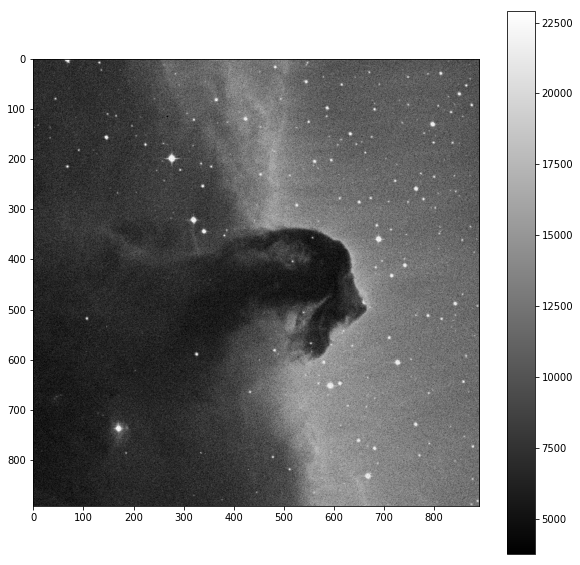

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(image_data,cmap='gray')
plt.colorbar();

## Let's get some basic statistics about our image

In [46]:
print('Min:',np.min(image_data))
print('Max:',np.max(image_data))
print('Mean:',np.mean(image_data))
print('Stdev:',np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


## Plotting a histogram
To make a histogram we'll need to cast the data from 1D to 2D

In this case, let's use the ndarray.flatten() to return a 1-D numpy array

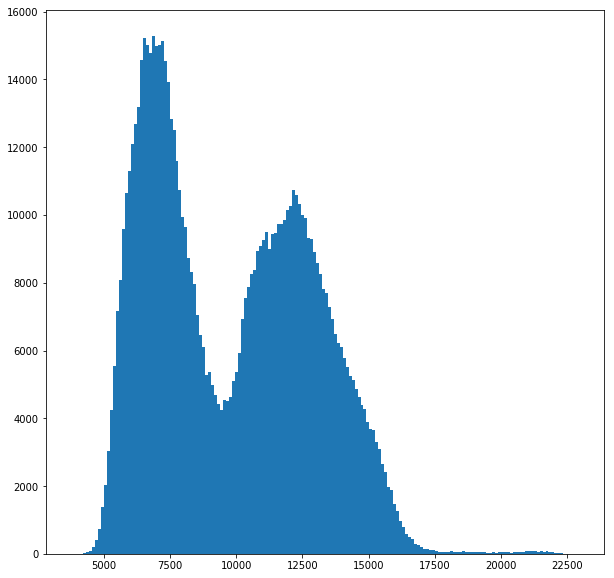

In [48]:
plt.figure(figsize=(10,10))
histogram = plt.hist(image_data.flatten(),bins="auto");

## Display the image with a logarithmic scale
What if we want a logarithmic color scale?

In [49]:
from matplotlib.colors import LogNorm

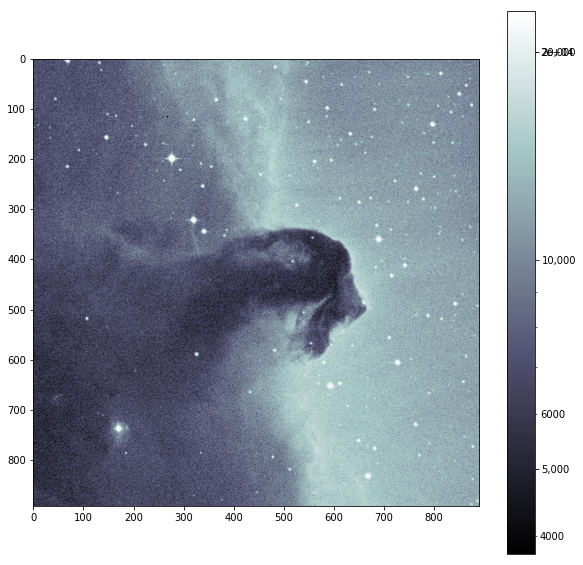

In [60]:
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap = "bone", norm = LogNorm())

# Choose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5e3,1e4,2e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000']);

## Stacking images
Since the noise in an image results from a random process, stacking images will improve the signal to noise of real features

In [63]:
# Make a list of filenames
image_list = ['M13_blue_0001.fits','M13_blue_0002.fits','M13_blue_0003.fits',\
              'M13_blue_0004.fits','M13_blue_0005.fits']

In [64]:
# Make an array of images from the list of images
image_concat = [fits.getdata(image) for image in image_list]

In [65]:
# Sum the images together
final_image = np.sum(image_concat, axis=0)

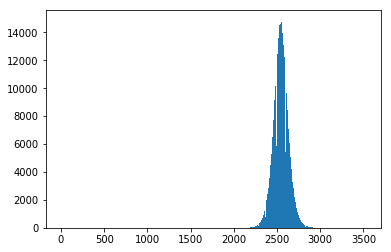

In [67]:
# Plot a histogram of the image pixel values
image_hist = plt.hist(final_image.flatten(), bins='auto')

We'll use the keywords vmin and vmax to set the limits on the color scaling for imshow.

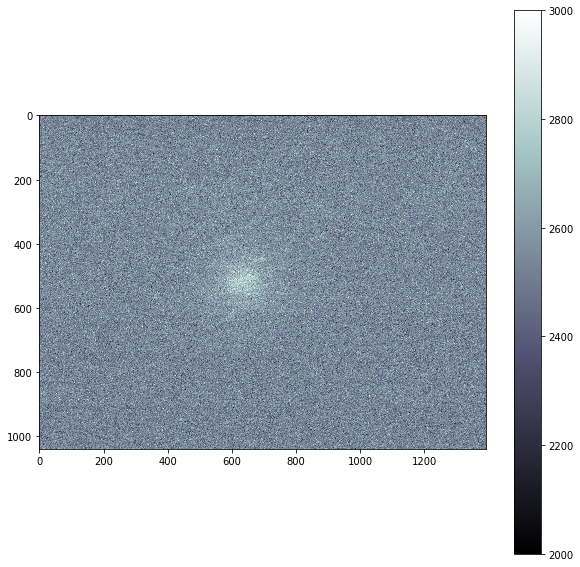

In [92]:
plt.figure(figsize=(10,10))
plt.imshow(final_image, cmap="bone", vmin=2e3, vmax=3e3)
plt.colorbar();

## Writing a new FITS file
We can eaisily do this with the writeto() method.

Warning: you'll receive an error if the file you are trying to write to already exists. That's why we've set clobber=True.

In [70]:
outfile = 'stacked_M13_blue.fits'
hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)